In [139]:
import numpy as np
import networkx as nx
import math
np.random.seed(0)

# Program to create two moon dataset

In [140]:
def semicircle1(r,n):
  return[[(math.cos(math.pi/n*x)*r) + np.random.normal(-10,10),
         (math.sin(math.pi/n*x)*r) + np.random.normal(-10,10)]
        for x in range(1,n+1)]

def semicircle2(r,n):
  return[[(math.cos(-math.pi/n*x)*r) + np.random.normal(-10,10) + 50,
         (math.sin(-math.pi/n*x)*r) + np.random.normal(-10,10) + 30]
        for x in range(1,n+1)]

In [141]:
x = []
for i in semicircle1(100,200):
  x.append(i)
for i in semicircle2(100,200):
  x.append(i)
x = np.array(x)

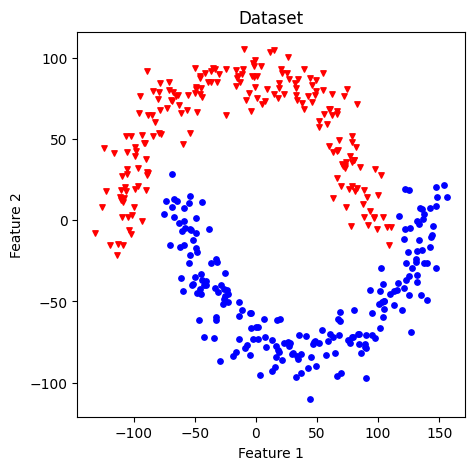

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(x[0:199,0], x[0:199,1], s= 15, color = 'red', marker = 'v')
plt.scatter(x[200:,0], x[200:,1], s= 15, color = 'blue', marker = 'o')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Program to create two concentric circle dataset

In [143]:
np.random.seed(0)

In [144]:
def circle(r,n=100):
  return[[(math.cos(2*math.pi/n*p)*r) + np.random.normal(-10,10),
         (math.sin(2*math.pi/n*p)*r) + np.random.normal(-10,10)]
        for p in range(1,n+1)]

In [164]:
c1 = []
for i in circle(100,200):
  c1.append(i)
c1 = np.array(c1)
c2 = []
for i in circle(20,200):
  c2.append(i)
c2 = np.array(c2)

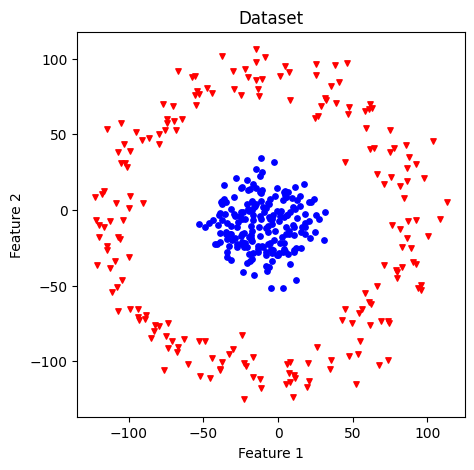

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.scatter(c1[0:199,0], c1[0:199,1], s= 15, color = 'red', marker = 'v')
plt.scatter(c2[0:199,0], c2[0:199,1], s= 15, color = 'blue', marker = 'o')
plt.title('Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Ceating graph for two concentric circle dataset

In [147]:
from math import sqrt

def euc_dis(r1,r2):
  distance = 0.0
  for i in range(len(r1)):
    distance+= (r1[i] - r2[i])**2
  return sqrt(distance)

In [ ]:
edges =[]
m=0
for i in c1:
  dist = []
  n=0
  for j in c2:
    d = euc_dis(i,j)
    dist.append(d)
    n+=1
  edges.append([m,np.argmin(dist)+200])
  m+=1
edges


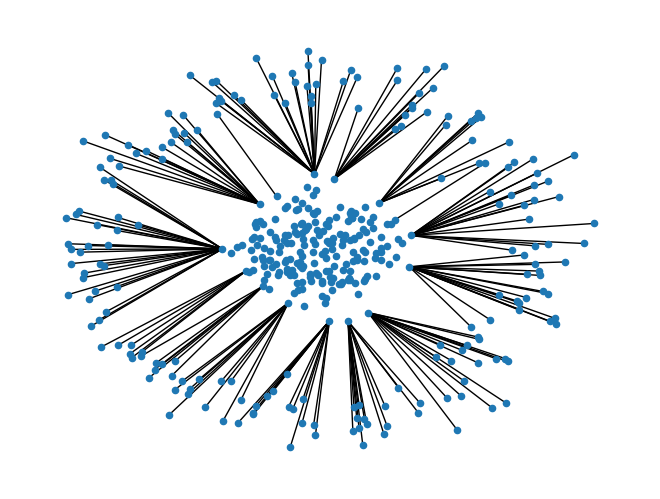

In [169]:
G = nx.Graph()
pos = {}

for i in range(len(c2)):
  G.add_node(i)
  pos[i] = (c1[i,0] , c1[i,1])
  G.add_node(len(c1)+i)
  pos[len(c1)+i] = (c2[i,0] , c2[i,1])

for e in edges:
  G.add_edge(e[0], e[1])

nx.draw(G, node_size = 20, pos = pos)